In [1]:
#!pip install yellowbrick <- First time running notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Determining optimal k 

## Loading data and formating 

In [3]:
df_z = pd.read_parquet('../common/covid_cases_z_trans.parquet')

In [4]:
df_case_per_popu = pd.read_parquet('../common/cases_per_popu_mod.parquet')

## Elbow method 

#### Z-transformed data 

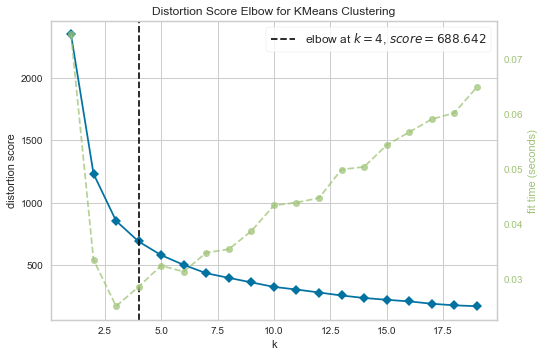

In [5]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(df_z.T)        
visualizer.show()

#### Cases per population

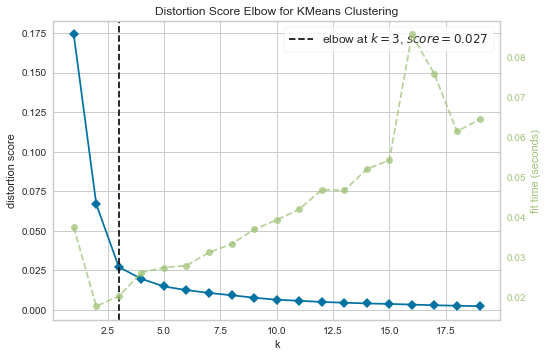

In [6]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(df_case_per_popu.T)        
visualizer.show()

## Silhouette Method

#### Z-transformed data 

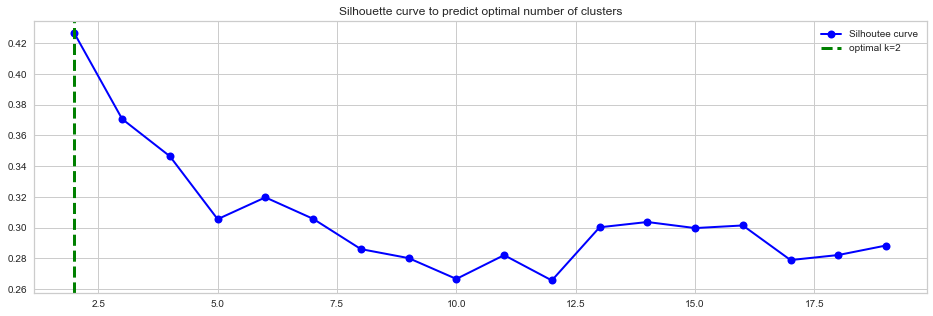

In [7]:
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k).fit(df_z.T) for k in range(1,20)]

silhouette_scores = [silhouette_score(df_z.T, model.labels_)
                    for model in kmeans_per_k[1:]]

#Compute the optimal nr of cluster
k = np.argmax(silhouette_scores)+2
rcParams['figure.figsize']= 16,5
_ = plt.plot(range(2,20), silhouette_scores, "bo-", color="blue", linewidth=2, markersize=8, label="Silhoutee curve")
_ = plt.title("Silhouette curve to predict optimal number of clusters")
_ = plt.axvline(x=k, linestyle='--', c='green', linewidth=3, label='optimal k='+str(k))
_ = plt.legend()
_ = plt.show()

#### Cases per population

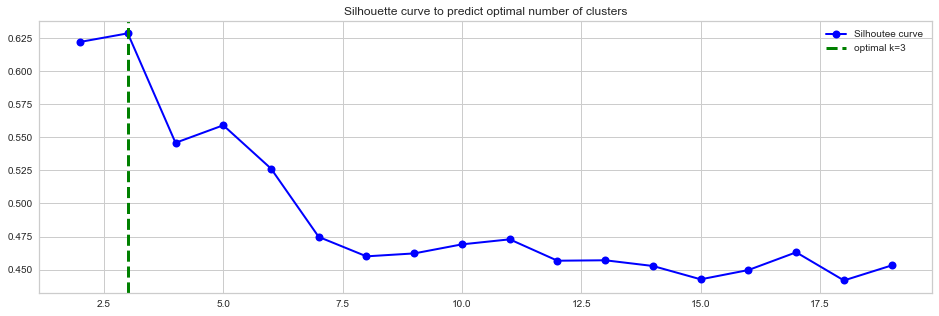

In [8]:
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k).fit(df_case_per_popu.T) for k in range(1,20)]

silhouette_scores = [silhouette_score(df_case_per_popu.T, model.labels_)
                    for model in kmeans_per_k[1:]]

#Compute the optimal nr of cluster
k = np.argmax(silhouette_scores)+2
rcParams['figure.figsize']= 16,5
_ = plt.plot(range(2,20), silhouette_scores, "bo-", color="blue", linewidth=2, markersize=8, label="Silhoutee curve")
_ = plt.title("Silhouette curve to predict optimal number of clusters")
_ = plt.axvline(x=k, linestyle='--', c='green', linewidth=3, label='optimal k='+str(k))
_ = plt.legend()
_ = plt.show()